In [2]:
## Import Lib
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
## Read data
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

In [4]:
recent_races = races[(races.year <= 2024) & (races.year >= 2000)].sort_values(by = ['year', 'round'])

In [5]:
recent_races['order'] = range(len(recent_races))

In [6]:
recent_standings = pd.merge(recent_races, constructor_standings, on='raceId')

In [7]:
recent_constructors = recent_standings[recent_standings.year == 2024].constructorId.unique()

In [8]:
round1 = recent_standings[recent_standings['round'] == 1][['order', 'year']].drop_duplicates()

<bound method Figure.show of <Figure size 1500x500 with 1 Axes>>

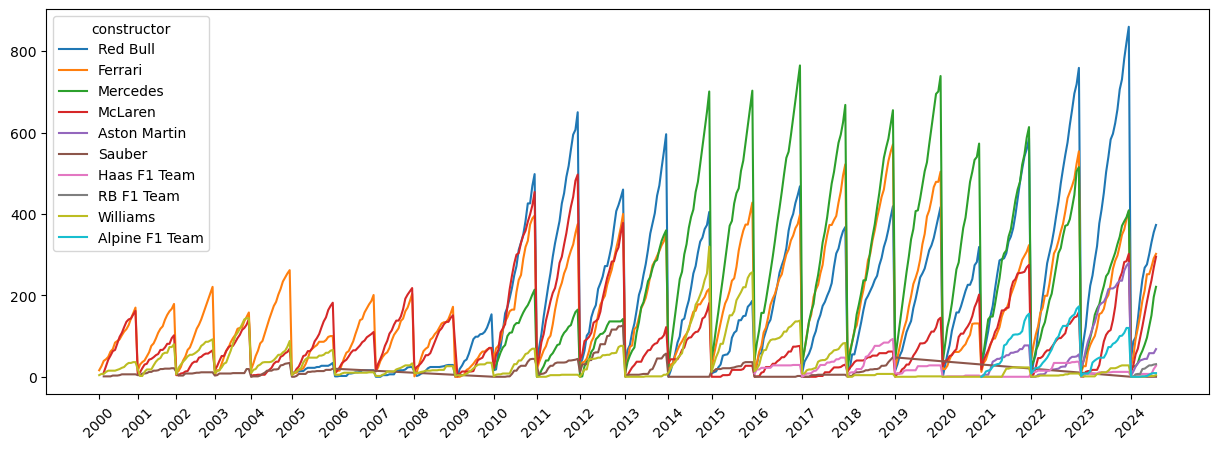

In [9]:
#
fig, ax = plt.subplots(figsize = (15,5))

for constructor in recent_constructors:
  selected = recent_standings[recent_standings.constructorId == constructor]
  name = constructors[constructors.constructorId == constructor].name.values[0]
  ax.plot(selected.order, selected.points, label = name)

ax.legend(title = 'constructor')
plt.xticks(round1['order'], round1['year'], rotation = 45)
fig.show

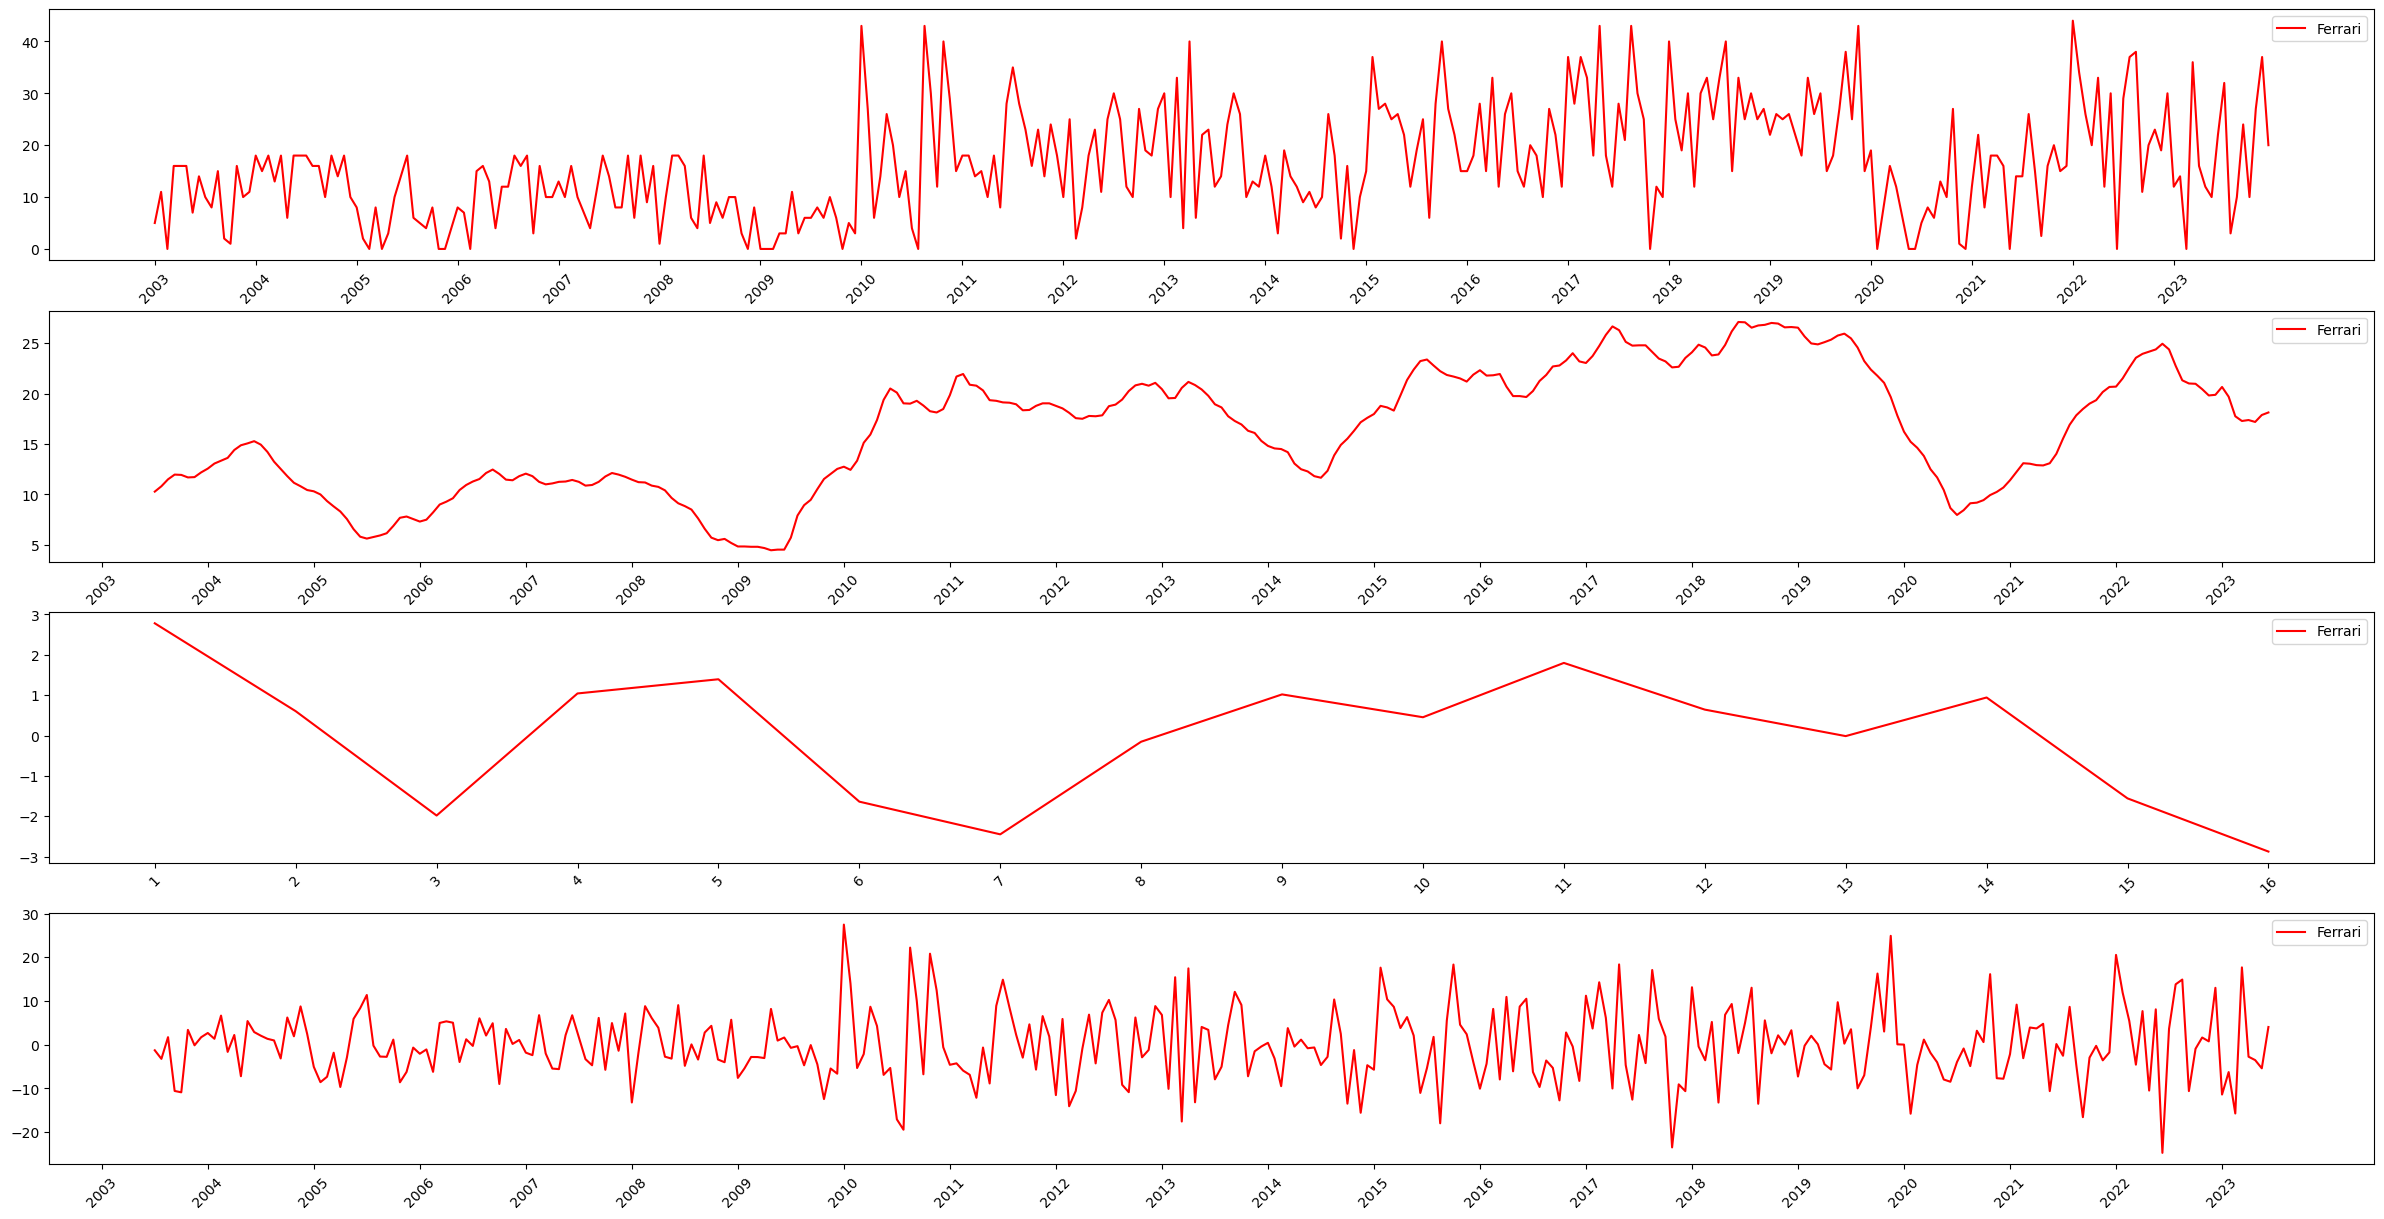

In [10]:
#Seasonal Decomposition

sorted_races = races[(races.year >= 2003) & (races.year <= 2023) & (races['round'] <= 16)].sort_values(by = ['year','round'])
fig, axes = plt.subplots(4 , 1, figsize = (30, 15))
ids = [1, 3, 6]
colors = ['orange', 'blue', 'red']

for id, color in zip(ids, colors):
  team_standings = constructor_results[constructor_results['constructorId'] == id]
  merged = pd.merge(sorted_races, team_standings)

result = seasonal_decompose(merged['points'], period = 16)

components = [result.observed, result.trend, result.seasonal[:16], result.resid]

label = constructors[constructors.constructorId == id].name.values[0]
for ax, components in zip(axes, components):
  components.plot(ax = ax, color = color, label=label)

round1 = merged[merged['round'] == 1]
for index, ax in enumerate(axes):
  ax.legend(loc = 'upper right')

  if index == 2:
    ax.set_xticks(range(0,16))
    ax.set_xticklabels(range(1, 17), rotation = 45)

  else:
    ax.set_xticks(round1.index)
    ax.set_xticklabels(round1.year, rotation = 45)

plt.show()

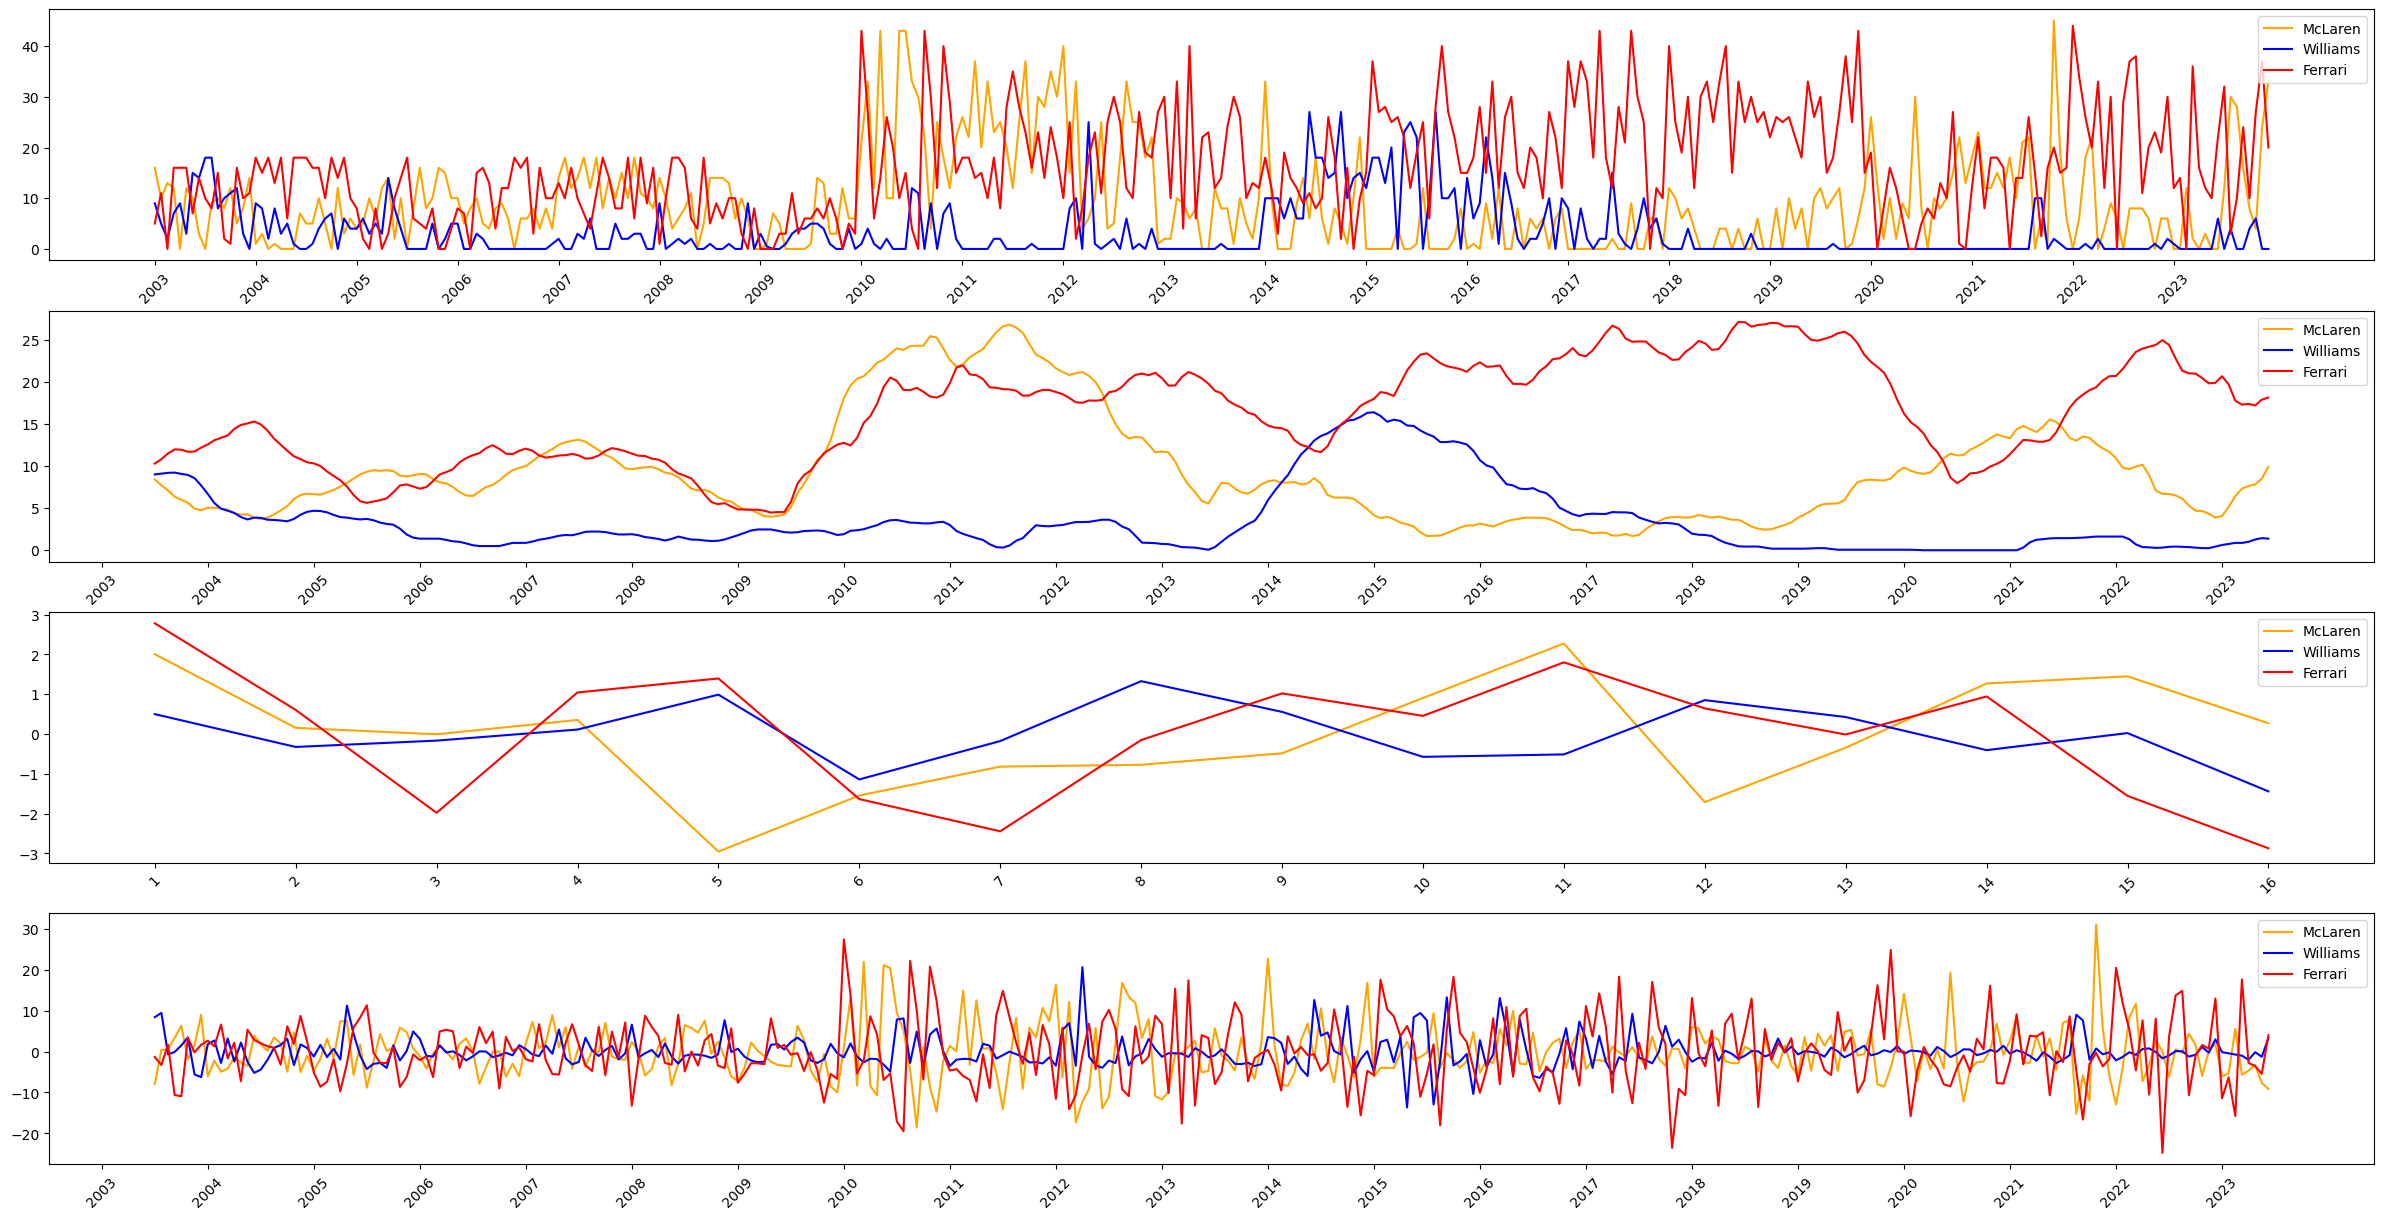

In [11]:
fig, axes = plt.subplots(4,1,figsize=(30,15))
ids = [1,3,6]
colors = ['orange','blue','red']

for id, color in zip(ids, colors):
  team_standings = constructor_results[constructor_results['constructorId']==id]
  merged = pd.merge(sorted_races, team_standings)

  result = seasonal_decompose(merged['points'],period=16)

  components = [result.observed, result.trend, result.seasonal[:16],result.resid]

  label = constructors[constructors.constructorId ==id].name.values[0]
  for ax, component in zip(axes, components):
    component.plot(ax=ax, color=color, label=label)

  round1 = merged[merged['round']==1]
  for index, ax in enumerate(axes):
    ax.legend(loc='upper right')

    if index ==2:
      ax.set_xticks(range(0,16))
      ax.set_xticklabels(range(1,17),rotation=45)

    else:
      ax.set_xticks(round1.index)
      ax.set_xticklabels(round1.year, rotation=45)

plt.show()